11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 11s 34ms/step - loss: 0.2796 - val_loss: 0.2177
Epoch 2/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1984 - val_loss: 0.1810
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1727 - val_loss: 0.1628
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1578 - val_loss: 0.1506
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1481 - val_loss: 0.1431
Epoch 6/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1419 - val_loss: 0.1380
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1369 - val_loss: 0.1336
Epoch 8/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1333 - val_loss: 0.1310
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1313 - val_loss: 0.1296
Epoch 10/50
235/235 [====

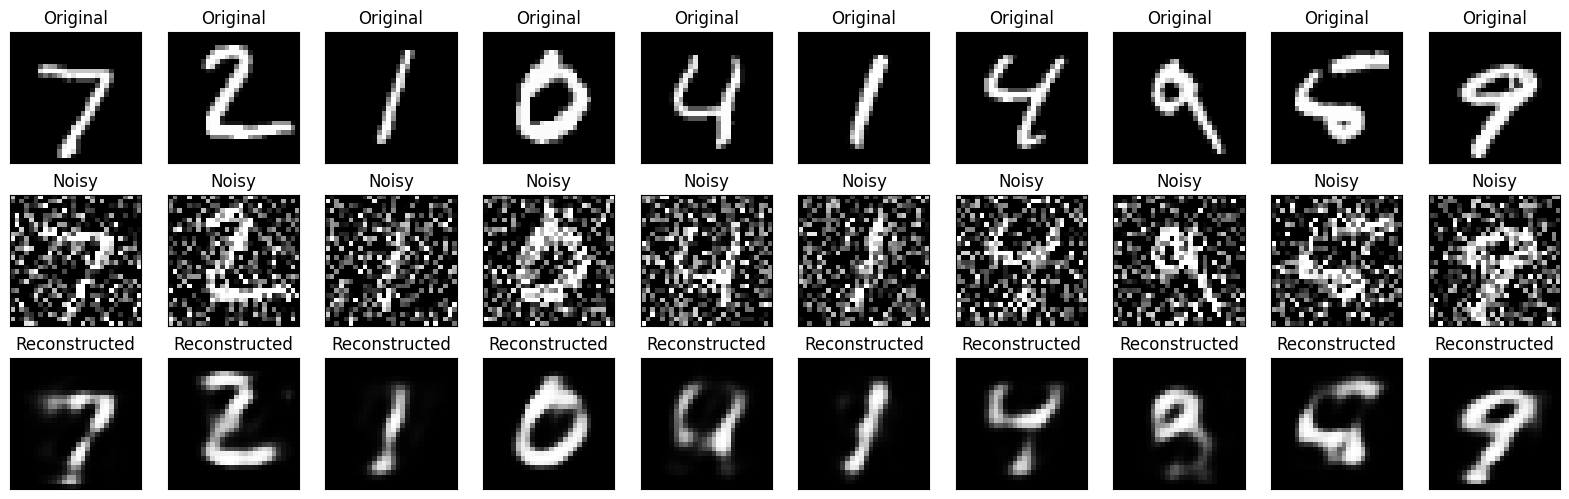

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import GaussianNoise

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data() #TRAIN AND TESTING

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images for the autoencoder
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introduce Gaussian noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the pixel values to be between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the denoising autoencoder model
encoding_dim = 32  # Size of the encoded representations
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Encode the test images
encoded_imgs = encoder.predict(x_test_noisy)

# Decode the encoded images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Original')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Reconstructed')

plt.show()
